In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
D=pd.read_json('out.1-solution-12-workers/df.json')
D['req_solutions'] = 1
# D=pd.read_json('out/df.json')

D1=pd.read_json('out.10-solutions-12-workers/df.json')
D1['req_solutions'] = 10
# D = D1 # pd.concat([D, D1])

# D1=pd.read_json('out.100-solutions-release-nointrospection-workerdependent-parallel-attempts/df.json')
# D1['req_solutions'] = 100
# D = pd.concat([D, D1])

# D1=pd.read_json('out.10-solutions-release-nointrospection-workerdependent-parallel-attempts/df.json')
# D1['req_solutions'] = 10
D = pd.concat([D, D1], ignore_index=True)

D.to_json('df.json', orient='records')


In [11]:
D

,workers,time,solutions,best cost,time/solutions,time(s),req_solutions
0,12,10514.00,3,159.095,3504.666667,10.51400,1
1,12,32523.90,2,161.472,16261.950000,32.52390,1
2,12,9537.97,4,159.092,2384.492500,9.53797,1
3,12,87258.50,12,157.040,7271.541667,87.25850,10
4,12,54323.40,10,157.040,5432.340000,54.32340,10
5,12,20222.90,11,157.536,1838.445455,20.22290,10


In [12]:

D['workers'].replace(0, 12, inplace=True)

# drop all where solutions < 500
D = D[D['solutions'] >= D['req_solutions']]

# D = D[D['workers'] < 8]

D['workers'] = D['workers'].astype('category')
worker_order = [c if c != -1 else 'seq' for c in sorted(D['workers'].cat.categories.tolist())]
D['workers'].replace(-1, 'seq', inplace=True)

D

/tmp/ipykernel_2866660/2819374826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  D['workers'].replace(0, 12, inplace=True)
/tmp/ipykernel_2866660/2819374826.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,workers,time,solutions,best cost,time/solutions,time(s),req_solutions
0,12,10514.00,3,159.095,3504.666667,10.51400,1
1,12,32523.90,2,161.472,16261.950000,32.52390,1
2,12,9537.97,4,159.092,2384.492500,9.53797,1
3,12,87258.50,12,157.040,7271.541667,87.25850,10
4,12,54323.40,10,157.040,5432.340000,54.32340,10
5,12,20222.90,11,157.536,1838.445455,20.22290,10


In [13]:
palette = sns.color_palette("colorblind", 3)

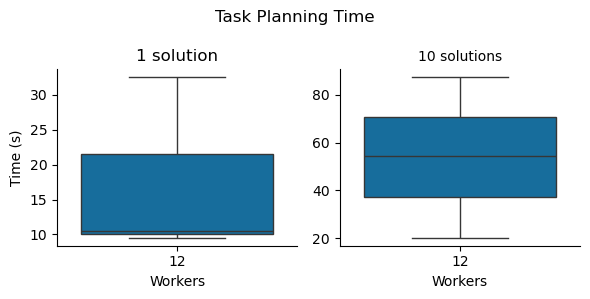

In [14]:
#sns.FacetGrid(D, col='req_solutions', sharey=False).map(sns.violinplot, 'workers', 'time(s)', density_norm='width', inner='points').set_axis_labels('Workers', 'Time (s)')
(
sns.FacetGrid(D, col='req_solutions', sharey=False)
#.map(sns.stripplot, 'workers', 'time(s)', order=worker_order, color=palette[0])
.map(sns.boxplot, 'workers', 'time(s)', showfliers=False, order=worker_order, color=palette[0])
.set_axis_labels('Workers', 'Time (s)')
.set_titles('{col_name} solutions')
)
plt.suptitle('Task Planning Time')

# set title of first on to "1 solution" (no s)
plt.gcf().axes[0].set_title('1 solution')

plt.tight_layout()
plt.show()

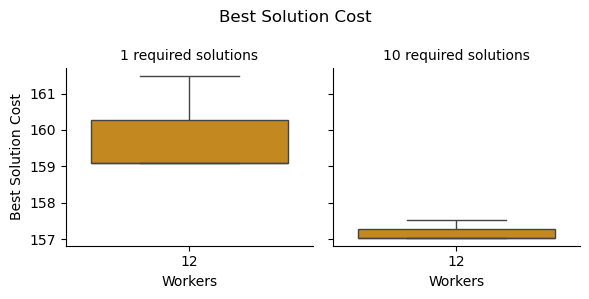

In [15]:
(
sns.FacetGrid(D, col='req_solutions', sharey=True)
.map(sns.boxplot, 'workers', 'best cost', showfliers=False, order=worker_order, color=palette[1])
.set_axis_labels('Workers', 'Best Solution Cost')
.set_titles('{col_name} required solutions')
)
plt.suptitle('Best Solution Cost')
plt.tight_layout()
#sns.FacetGrid(D, col='req_solutions', sharey=False).map(sns.stripplot, 'workers', 'best cost')
#sns.FacetGrid(D, col='req_solutions', sharey=False).map(sns.violinplot, 'workers', 'best cost', density_norm='width', inner='points').set_axis_labels('Workers', 'Best cost')
plt.show()